In [2]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import datetime
import scipy.stats as st
import matplotlib.pyplot as plt
from scipy.stats import linregress
# File to Load (Remember to Change These)
file = "data/Daily_Dow_Jones.csv"

dow_data= pd.read_csv(file)

dow_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/29/1985,1277.719971,1295.489990,1266.890015,1292.619995,1292.619995,13560000
1,1/30/1985,1297.369995,1305.099976,1278.930054,1287.880005,1287.880005,16820000
2,1/31/1985,1283.239990,1293.400024,1272.640015,1286.770020,1286.770020,14070000
3,2/1/1985,1276.939941,1286.109985,1269.770020,1277.719971,1277.719971,10980000
4,2/4/1985,1272.079956,1294.939941,1268.989990,1290.079956,1290.079956,11630000


In [3]:
#Add Month and year columns
#dow_data['Date'] = pd.to_datetime(dow_data['Date'])
dow_data['year']=pd.DatetimeIndex(dow_data['Date']).year
dow_data['month']=pd.DatetimeIndex(dow_data['Date']).month
dow_data= dow_data.drop(columns=['Open','Low','High','Adj Close','Volume','Date'])
dow_data['date'] = pd.to_datetime(dow_data[['year', 'month']].assign(DAY=1))

dow_data.head()

,Close,year,month,date
0,1292.619995,1985,1,1985-01-01
1,1287.880005,1985,1,1985-01-01
2,1286.770020,1985,1,1985-01-01
3,1277.719971,1985,2,1985-02-01
4,1290.079956,1985,2,1985-02-01


In [4]:
dow_data_monthly= dow_data.groupby(["date"])

avg_close =dow_data_monthly["Close"].mean()

stock_data= pd.DataFrame({"Close Price":avg_close})

stock_data

,Close Price
date,
1985-01-01,1289.090007
1985-02-01,1283.232101
1985-03-01,1268.829997
1985-04-01,1266.358114
1985-05-01,1279.397738
...,...
2020-01-01,28879.994326
2020-02-01,28519.731601
2020-03-01,22637.420810


In [5]:
# File to Load (Remember to Change These)
file2 = "data/Crude_Oil_Prices.csv"

oil_data= pd.read_csv(file2)

oil_data.head()

,Month,Year,Crude Oil Domestic First Purchase Price (Dollars per Barrel),Free on Board Cost of Crude Oil Imports (Dollars per Barrel),Landed Cost of Crude Oil Imports (Dollars per Barrel),"Refiner Acquisition Cost of Crude Oil, Domestic (Dollars per Barrel)","Refiner Acquisition Cost of Crude Oil, Imported (Dollars per Barrel)","Refiner Acquisition Cost of Crude Oil, Composite (Dollars per Barrel)"
0,1,1973,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
1,2,1973,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
2,3,1973,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
3,4,1973,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
4,5,1973,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available


In [6]:
#remove rows before 198
oil_data=oil_data[(oil_data['Year']>1984)]
oil_data['date'] = pd.to_datetime(oil_data[['Year', 'Month']].assign(DAY=1))
oil_data= oil_data.drop(columns=['Free on Board Cost of Crude Oil Imports (Dollars per Barrel)',
                                 'Landed Cost of Crude Oil Imports (Dollars per Barrel)',
                                 'Refiner Acquisition Cost of Crude Oil, Domestic (Dollars per Barrel)',
                                 'Refiner Acquisition Cost of Crude Oil, Imported (Dollars per Barrel)',
                                 'Refiner Acquisition Cost of Crude Oil, Composite (Dollars per Barrel)','Month','Year'])
oil_data

,Crude Oil Domestic First Purchase Price (Dollars per Barrel),date
144,24.26,1985-01-01
145,23.64,1985-02-01
146,23.89,1985-03-01
147,24.19,1985-04-01
148,24.18,1985-05-01
...,...,...
561,53.14,2019-10-01
562,54.96,2019-11-01
563,58.41,2019-12-01
564,56.86,2020-01-01


In [7]:
#Remove the "Not Available Rows"
oil_data= oil_data.rename(columns={"Crude Oil Domestic First Purchase Price (Dollars per Barrel)":'Crude_Oil_Price'})
oil_data= oil_data[['date','Crude_Oil_Price']]
index= oil_data[(oil_data['Crude_Oil_Price'] =='Not Available')].index

oil_data.drop(index, inplace=True)

oil_data

,date,Crude_Oil_Price
144,1985-01-01,24.26
145,1985-02-01,23.64
146,1985-03-01,23.89
147,1985-04-01,24.19
148,1985-05-01,24.18
...,...,...
560,2019-09-01,55.07
561,2019-10-01,53.14
562,2019-11-01,54.96
563,2019-12-01,58.41


In [8]:
combined_data=oil_data.merge(stock_data, on='date')
combined_data

,date,Crude_Oil_Price,Close Price
0,1985-01-01,24.26,1289.090007
1,1985-02-01,23.64,1283.232101
2,1985-03-01,23.89,1268.829997
3,1985-04-01,24.19,1266.358114
4,1985-05-01,24.18,1279.397738
...,...,...,...
416,2019-09-01,55.07,26900.213964
417,2019-10-01,53.14,26736.797724
418,2019-11-01,54.96,27797.046093
419,2019-12-01,58.41,28167.005768


In [9]:
combined_data= combined_data.astype({'Crude_Oil_Price': float})

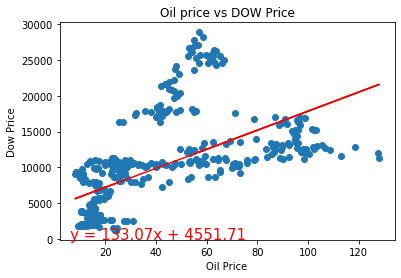

In [10]:
#Create Linear Regression
x_values = combined_data['Crude_Oil_Price']
y_values = combined_data['Close Price']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Oil Price')
plt.ylabel('Dow Price')
plt.title("Oil price vs DOW Price")
plt.show()

In [11]:
combined_data.to_csv(f"data/oil_dow_prices.csv")